In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import cPickle as cp
import sys
sys.path.append("../../utils/")
from plot_utils import get_colors
from data_loader import load_census_data

In [2]:
def get_value_from_dict(folder_name, key=None):
    with open(folder_name + "/results.pkl") as f:
        res_dict = cp.load(f)
    return res_dict[key]

In [3]:
colors_dict = get_colors()

# 8192 fp feat

In [4]:
general_folder = "/dfs/scratch0/zjian/lp_kernel/census_results_64_bit_fixed_design_opt_lambda"

In [5]:
def get_l2_error_with_fixed_design_theory(subkey_list, result_folder):
    l2_error_train_list = []
    l2_error_test_list = []
    theory_l2_error_test_list = []
    subdirs = [x[0] for x in os.walk(result_folder)] 
    for subdir in subdirs:
        is_target = True
        for subkey in subkey_list:
            if subkey not in subdir:
                is_target = False
                break
            if ("seed_1_" not in subdir) and ("seed_2_" not in subdir) and ("seed_3_" not in subdir):
                is_target = False
                break
        if is_target:
#             print subdir
            l2_error_train_list.append(np.sqrt(get_value_from_dict(subdir, "train_l2_error") ) )
            l2_error_test_list.append(np.sqrt(get_value_from_dict(subdir, "test_l2_error") ) )
            theory_l2_error_test_list.append(np.sqrt(get_value_from_dict(subdir, "theory_test_l2_error") ) )
#             print subdir, theory_l2_error_test_list, l2_error_test_list
    return l2_error_train_list, l2_error_test_list, theory_l2_error_test_list

In [6]:
X_train, X_test, Y_train, Y_test = load_census_data("../../../data/census/")

In [7]:
with open("/dfs/scratch0/zjian/lp_kernel/census_results_64_bit_fixed_design_opt_lambda/lambda__seed_2_exact_noise_sigma_1e4/results.pkl", "r") as f:
    test = cp.load(f)
print test

with open("/dfs/scratch0/zjian/lp_kernel/census_results_64_bit_fixed_design_opt_lambda/lambda__seed_1_n_fp_feat_1024_lp_rff_nbit_8_noise_sigma_1e-2/results.pkl", "r") as f:
    test = cp.load(f)
print test

with open("/dfs/scratch0/zjian/lp_kernel/census_results_64_bit_fixed_design_opt_lambda/lambda__seed_2_n_fp_feat_1024_fp_rff_noise_sigma_1e-2/results.pkl", "r") as f:
    test = cp.load(f)
print test



with open("/dfs/scratch0/zjian/lp_kernel/census_results_64_bit_fixed_design_opt_lambda/lambda__seed_1_exact_noise_sigma_1e1/results.pkl", "r") as f:
    test = cp.load(f)
print test

with open("/dfs/scratch0/zjian/lp_kernel/census_results_64_bit_fixed_design_opt_lambda/lambda__seed_2_n_fp_feat_1024_fp_rff_noise_sigma_1e-2/results.pkl", "r") as f:
    test = cp.load(f)
print test

{'train_approx_error': 0.0, 'theory_test_l2_error': 115672139.3714667, 'train_l2_error': 95208752.30883744, 'test_approx_error': 0.0, 'test_l2_error': 114841591.35182728}
{'train_approx_error': 67312.1643440069, 'theory_test_l2_error': 5943898.631148248, 'train_l2_error': 5943864.74806955, 'test_approx_error': 67312.1643440069, 'test_l2_error': 5943864.808333649}
{'train_approx_error': 165638.29291930998, 'theory_test_l2_error': 18499995.859770499, 'train_l2_error': 18500280.52036098, 'test_approx_error': 165638.29291930998, 'test_l2_error': 18500281.68619983}
{'train_approx_error': 0.0, 'theory_test_l2_error': 213.68337177169224, 'train_l2_error': 14.018933882251407, 'test_approx_error': 0.0, 'test_l2_error': 213.40554558201876}
{'train_approx_error': 165638.29291930998, 'theory_test_l2_error': 18499995.859770499, 'train_l2_error': 18500280.52036098, 'test_approx_error': 165638.29291930998, 'test_l2_error': 18500281.68619983}


exact
[4.0003839581398726] [3.9888432090259953]
ffp
[27943.447831955371] [27943.347118719208]
[17565.156492137801] [17565.094027679588]
[11300.108820661902] [11300.071826698282]
[7465.8771729218497] [7465.876409064309]
[5441.321181809174] [5441.3069918051397]
[4324.7192985783968] [4324.7169864317902]
[3245.3452565002458] [3245.3517666698185]
[2210.6573241702977] [2210.6593221664521]
[1284.1919234152781] [1284.1923535337039]
32 nbit
[27943.474878213612] [27943.369150057712]
[17565.147601039305] [17565.100207202999]
[11300.104200106411] [11300.051717850327]
[7465.880189932057] [7465.8416755335247]
[5441.3250228250481] [5441.3180944627256]
[4324.7175253432033] [4324.716344226782]
[3245.3453168804394] [3245.3438285579427]
[2210.6578320223571] [2210.6483110531149]
[1284.1941742666299] [1284.196442480018]
8 nbit
[11319.19671028252] [11319.155850389778]
[7482.5822042683185] [7482.5558031038263]
[5466.7455453976918] [5466.7214442081922]
[4368.5102015754974] [4368.493576986456]
[3344.9376835754

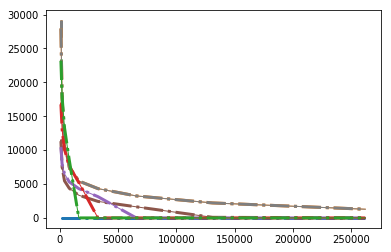

In [12]:
for noise_sigma in ["1e0"]:

    plt.figure()
    fp_bits = 32
    nbit_list = [32, 8, 4, 2, 1]
    n_feat_list = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]

        # exact kernel
    print "exact"
    train_mean_list = []
    test_mean_list = []
    theory_mean_list = []
    train_std_list = []
    test_std_list = []
    theory_std_list = []
    subkey_list_input = ["exact", "noise_sigma_" + noise_sigma]
    train_mean, train_std, test_mean, test_std, theory_mean, theory_std = get_perf_for_one_precision(subkey_list_input, general_folder)
    print theory_mean, test_mean
    test_mean_list.append(np.min(test_mean) )
    train_mean_list.append(train_mean[np.argmin(test_mean) ] )
    theory_mean_list.append(theory_mean[np.argmin(test_mean) ] )
    test_std_list.append(test_std[np.argmin(test_mean) ] )
    train_std_list.append(train_std[np.argmin(test_mean) ] )
    theory_std_list.append(theory_std[np.argmin(test_mean) ] )
    plt.errorbar(np.array(n_feat_list) * fp_bits, test_mean_list * len(n_feat_list), color=colors_dict["exact"], linewidth=1, fmt="-", yerr=test_std_list * len(n_feat_list), label="exact kernel")
    plt.errorbar(np.array(n_feat_list) * fp_bits, theory_mean_list * len(n_feat_list), color=colors_dict["exact"], linewidth=3, fmt="-.", yerr=theory_std_list * len(n_feat_list), label="exact kernel")
    # need to rerun exact kernels
    
    # fp results
    print "ffp"
    train_mean_list = []
    test_mean_list = []
    train_std_list = []
    test_std_list = []
    theory_mean_list = []
    theory_std_list = []
    for n_feat in n_feat_list:
        subkey_list_input = ["fp_rff", "n_fp_feat_" + str(n_feat), "noise_sigma_" + noise_sigma]
        train_mean, train_std, test_mean, test_std, theory_mean, theory_std = get_perf_for_one_precision(subkey_list_input, general_folder)
        print theory_mean, test_mean
        test_mean_list.append(np.min(test_mean) )
        train_mean_list.append(train_mean[np.argmin(test_mean) ] )
        theory_mean_list.append(theory_mean[np.argmin(test_mean) ] )
        test_std_list.append(test_std[np.argmin(test_mean) ] )
        train_std_list.append(train_std[np.argmin(test_mean) ] )
        theory_std_list.append(theory_std[np.argmin(test_mean) ] )
    plt.errorbar(np.array(n_feat_list) * fp_bits, test_mean_list, color=colors_dict["fp"], linewidth=1, fmt="-", yerr=test_std_list, label="fp rff")
    plt.errorbar(np.array(n_feat_list) * fp_bits, theory_mean_list, color=colors_dict["fp"], linewidth=3, fmt="-.", yerr=theory_std_list, label="fp rff")

    for nbit in nbit_list:
        print nbit, "nbit"
        train_mean_list = []
        test_mean_list = []
        train_std_list = []
        test_std_list = []
        theory_mean_list = []
        theory_std_list = []
        for n_feat in n_feat_list:
    #         print "nbit ", nbit, "n_feat", n_feat
            subkey_list_input = ["lp_rff", "nbit_" + str(nbit) + "_", "n_fp_feat_" + str(n_feat), "noise_sigma_" + noise_sigma]
            train_mean, train_std, test_mean, test_std, theory_mean, theory_std = get_perf_for_one_precision(subkey_list_input, general_folder)
            print theory_mean, test_mean
            test_mean_list.append(np.min(test_mean) )
            train_mean_list.append(train_mean[np.argmin(test_mean) ] )
            theory_mean_list.append(theory_mean[np.argmin(test_mean) ] )
            test_std_list.append(test_std[np.argmin(test_mean) ] )
            theory_std_list.append(theory_std[np.argmin(test_mean) ] )
        plt.errorbar(np.array(n_feat_list) * fp_bits, test_mean_list, color=colors_dict[str(nbit)], linewidth=1, fmt="-", yerr=test_std_list, label="nbit " + str(nbit) )        
        plt.errorbar(np.array(n_feat_list) * fp_bits, theory_mean_list, color=colors_dict[str(nbit)], linewidth=3, fmt="-.", yerr=theory_std_list, label="nbit " + str(nbit) )        

    
    
    plt.show()

exact
[4.0003839581398726] [3.9888432090259953]
ffp
[27943.447831955371] [27943.347118719208]
[17565.156492137801] [17565.094027679588]
[11300.108820661902] [11300.071826698282]
[7465.8771729218497] [7465.876409064309]
[5441.321181809174] [5441.3069918051397]
[4324.7192985783968] [4324.7169864317902]
[3245.3452565002458] [3245.3517666698185]
[2210.6573241702977] [2210.6593221664521]
[1284.1919234152781] [1284.1923535337039]
32 nbit
[27943.474878213612] [27943.369150057712]
[17565.147601039305] [17565.100207202999]
[11300.104200106411] [11300.051717850327]
[7465.880189932057] [7465.8416755335247]
[5441.3250228250481] [5441.3180944627256]
[4324.7175253432033] [4324.716344226782]
[3245.3453168804394] [3245.3438285579427]
[2210.6578320223571] [2210.6483110531149]
[1284.1941742666299] [1284.196442480018]
8 nbit
[11319.19671028252] [11319.155850389778]
[7482.5822042683185] [7482.5558031038263]
[5466.7455453976918] [5466.7214442081922]
[4368.5102015754974] [4368.493576986456]
[3344.9376835754

/afs/cs.stanford.edu/u/zjian/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


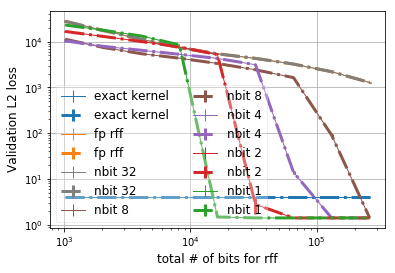

exact
[14.617912701115046] [14.572127136585522]
ffp
[27943.449610208481] [27943.352685324426]
[17565.159322717871] [17565.107641286279]
[11300.113238132471] [11300.111240244501]
[7465.8839122745521] [7465.8235836209205]
[5441.3305637106287] [5441.2663544442212]
[4324.7314606857863] [4324.6412485253395]
[3245.3624180824686] [3245.3678221877904]
[2210.68531990153] [2210.6502474631329]
[1286.3163500357223] [1286.339336607866]
32 nbit
[27943.476656465078] [27943.378753498284]
[17565.150431620816] [17565.14635803497]
[11300.10861757882] [11300.141788635252]
[7465.8869292816307] [7465.8477600232627]
[5441.3344047198962] [5441.3033666387282]
[4324.7296874555168] [4324.7985924127015]
[3245.3624784623444] [3245.3046132076338]
[2210.6858277470637] [2210.6987063104248]
[1286.3183945086034] [1286.4049781875997]
8 nbit
[11319.201120262629] [11319.162316457448]
[7482.5889286423671] [7482.5436836858607]
[5466.7548836245232] [5466.8247445841216]
[4368.5222417512232] [4368.4734228023772]
[3344.95433379

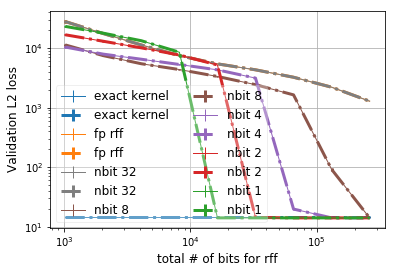

exact
[141.35668859345822] [141.4188616023896]
ffp
[27943.627434943275] [27944.016502082319]
[17565.442378416479] [17565.694458388582]
[11300.55497644736] [11299.96608368906]
[7466.5578167263848] [7466.2726092647326]
[5442.2686721706232] [5441.7832550905287]
[4325.9474987396798] [4325.3166110655366]
[3247.0781182052947] [3247.4633952332092]
[2213.483104704877] [2214.0141118185052]
[1289.2948523276768] [1289.3217878302057]
32 nbit
[27943.654481036316] [27943.810972817399]
[17565.433487463466] [17565.389832230765]
[11300.550356077782] [11299.774067384269]
[7466.5608334206963] [7466.5221093090468]
[5442.2725125197076] [5442.4769834422314]
[4325.9457260016679] [4325.3973184888719]
[3247.0781785534309] [3247.2951871897299]
[2213.4836118993499] [2213.4651042358209]
[1289.2949371568629] [1288.9839542673453]
8 nbit
[11319.642109576278] [11319.958377674033]
[7483.2613354332798] [7483.0582926588368]
[5467.6886257590259] [5467.323997071373]
[4369.726091780085] [4369.6562946694248]
[3346.618937615

/lfs/1/zjian/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/lfs/1/zjian/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/lfs/1/zjian/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/lfs/1/zjian/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/lfs/1/zjian/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[nan] [nan]


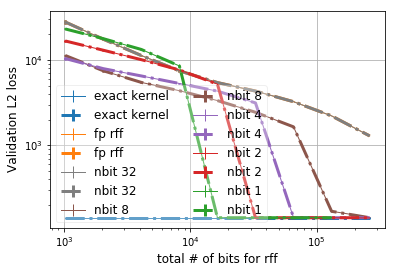

exact
[1392.3475635006719] [1386.610730030196]
ffp
[27961.404154194097] [27963.326430932182]
[17593.724902203525] [17594.677784043259]
[11344.641729991197] [11345.504170150458]
[7533.6428714819231] [7539.7498170049685]
[5535.2765911600254] [5529.7492308873916]
[4445.8718344736744] [4449.9508380104826]
[3414.2966382922245] [3422.7860898275903]
[2470.1983775719978] [2469.759196281495]
[1776.6273596835265] [1762.5371884732604]
32 nbit
[27961.431183946246] [27956.638463036517]
[17593.716025619109] [17600.356754642631]
[11344.637127917682] [11347.994498605944]
[7533.6458573728296] [7532.0012500286512]
[5535.2803671631636] [5539.9739932887178]
[4445.8701089840988] [4449.8705404637358]
[3414.2966956926207] [3416.002228796744]
[2470.1994442546647] [2473.2959818397712]
[1776.627499979129] [1776.5342394908128]
8 nbit
[11363.654406456728] [11367.290729553026]
[7550.1986363459537] [7552.3163952270661]
[5560.2709576781381] [5557.4541371027617]
[4488.4807437350164] [4484.711684165185]
[3509.09387763

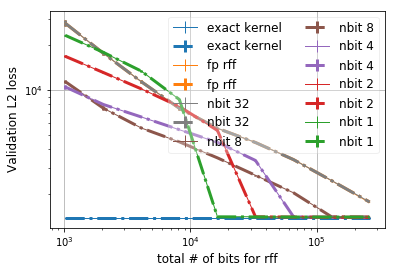

exact
[10755.098296690157] [10741.048994985174]
ffp
[29685.005473563957] [29756.112395210643]
[20222.889578840317] [20266.935631899873]
[15116.514971719218] [15083.026643873733]
[12541.964376104959] [12540.408031069068]
[11513.073520749409] [11501.641819789673]
[11129.30723638511] [11111.390660622106]
[10911.157988381603] [10903.69520996374]
[10820.069018000126] [10792.000607315809]
[10784.673494221644] [10848.113812701624]
32 nbit
[29685.031006531353] [29729.083199355766]
[20222.881860329962] [20327.487398051806]
[15116.511529666366] [15092.573412442069]
[12541.964376023927] [12500.018527928378]
[11513.0735206437] [11488.83015804213]
[11129.307236487371] [11149.506864521527]
[10911.157988392677] [10882.227677736566]
[10820.069017970343] [10770.257349931917]
[10784.673494220055] [10796.59205610772]
8 nbit
[15130.773507750951] [15119.275323954416]
[12551.908507361217] [12522.64190128731]
[11524.739040581122] [11556.469207810209]
[11142.892062896826] [11123.316576178937]
[10924.113527519

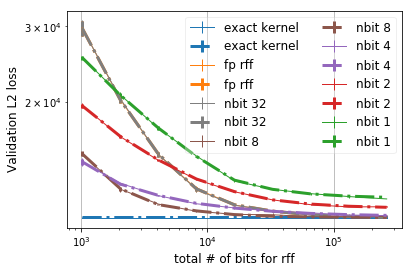

exact
[100459.87531263266] [100545.88967213422]
ffp
[103929.16518383061] [103479.22245182452]
[101710.29253348632] [101415.84259812861]
[100929.45660763317] [100866.66888470777]
[100644.13686760078] [100455.77236430194]
[100541.53070851472] [100996.29631038482]
[100504.34293398967] [100884.0946665886]
[100482.18067936755] [100131.23912560208]
[100470.87994422943] [100343.27594397288]
[100465.52817031805] [100355.52035436657]
32 nbit
[103929.16518390736] [104244.59227040096]
[101710.29253351997] [101588.91133945326]
[100929.45660763791] [100570.53949247627]
[100644.13686759475] [100345.50239992117]
[100541.53070851152] [100997.01299993678]
[100504.3429339974] [101320.28176457698]
[100482.18067938159] [100096.16459834324]
[100470.87994422771] [100397.59218728733]
[100465.52817031209] [100222.37980655636]
8 nbit
[100931.36792235075] [100779.98210625471]
[100644.94146933554] [101179.60936769214]
[100541.92421130242] [100273.16632153919]
[100504.58918410634] [100325.19019063564]
[100482.276

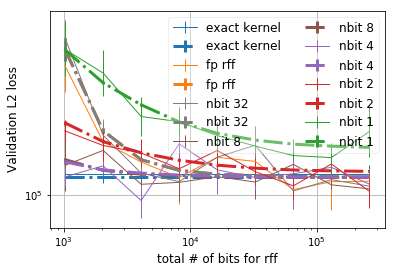

In [9]:
# plot for fixed number of features
def get_perf_for_one_precision(subkey_list_input, general_folder):
    fp_bits = 32
    l2_train_mean = []
    l2_train_std = []
    l2_test_mean = []
    l2_test_std = []
    theory_l2_test_mean = []
    theory_l2_test_std = []
    subkey_list = subkey_list_input
    l2_train, l2_test, theory_l2_test  = get_l2_error_with_fixed_design_theory(subkey_list, general_folder)
    
#     print "train ", l2_train
#     print "test ", l2_test
#     print "theory ", theory_l2_test    
    l2_train_mean.append(np.mean(l2_train) ) 
    l2_train_std.append(np.std(l2_train) )
    l2_test_mean.append(np.mean(l2_test) )
    l2_test_std.append(np.std(l2_test) )
    theory_l2_test_mean.append(np.mean(theory_l2_test) )
    theory_l2_test_std.append(np.std(theory_l2_test) )
    return l2_train_mean, l2_train_std, l2_test_mean, l2_test_std, theory_l2_test_mean, theory_l2_test_std
    
for noise_sigma in ["1e0", "1e1", "1e2", "1e3","1e4", "1e5"]:

    plt.figure()
    fp_bits = 32
    nbit_list = [32, 8, 4, 2, 1]
    n_feat_list = [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]

    # exact kernel
    print "exact"
    train_mean_list = []
    test_mean_list = []
    theory_mean_list = []
    train_std_list = []
    test_std_list = []
    theory_std_list = []
    subkey_list_input = ["exact", "noise_sigma_" + noise_sigma]
    train_mean, train_std, test_mean, test_std, theory_mean, theory_std = get_perf_for_one_precision(subkey_list_input, general_folder)
    print theory_mean, test_mean
    test_mean_list.append(np.min(test_mean) )
    train_mean_list.append(train_mean[np.argmin(test_mean) ] )
    theory_mean_list.append(theory_mean[np.argmin(test_mean) ] )
    test_std_list.append(test_std[np.argmin(test_mean) ] )
    train_std_list.append(train_std[np.argmin(test_mean) ] )
    theory_std_list.append(theory_std[np.argmin(test_mean) ] )
    plt.errorbar(np.array(n_feat_list) * fp_bits, test_mean_list * len(n_feat_list), color=colors_dict["exact"], linewidth=1, fmt="-", yerr=test_std_list * len(n_feat_list), label="exact kernel")
    plt.errorbar(np.array(n_feat_list) * fp_bits, theory_mean_list * len(n_feat_list), color=colors_dict["exact"], linewidth=3, fmt="-.", yerr=theory_std_list * len(n_feat_list), label="exact kernel")
    # need to rerun exact kernels

    # fp results
    print "ffp"
    train_mean_list = []
    test_mean_list = []
    train_std_list = []
    test_std_list = []
    theory_mean_list = []
    theory_std_list = []
    for n_feat in n_feat_list:
        subkey_list_input = ["fp_rff", "n_fp_feat_" + str(n_feat), "noise_sigma_" + noise_sigma]
        train_mean, train_std, test_mean, test_std, theory_mean, theory_std = get_perf_for_one_precision(subkey_list_input, general_folder)
        print theory_mean, test_mean
        test_mean_list.append(np.min(test_mean) )
        train_mean_list.append(train_mean[np.argmin(test_mean) ] )
        theory_mean_list.append(theory_mean[np.argmin(test_mean) ] )
        test_std_list.append(test_std[np.argmin(test_mean) ] )
        train_std_list.append(train_std[np.argmin(test_mean) ] )
        theory_std_list.append(theory_std[np.argmin(test_mean) ] )
    plt.errorbar(np.array(n_feat_list) * fp_bits, test_mean_list, color=colors_dict["fp"], linewidth=1, fmt="-", yerr=test_std_list, label="fp rff")
    plt.errorbar(np.array(n_feat_list) * fp_bits, theory_mean_list, color=colors_dict["fp"], linewidth=3, fmt="-.", yerr=theory_std_list, label="fp rff")


    for nbit in nbit_list:
        print nbit, "nbit"
        train_mean_list = []
        test_mean_list = []
        train_std_list = []
        test_std_list = []
        theory_mean_list = []
        theory_std_list = []
        for n_feat in n_feat_list:
    #         print "nbit ", nbit, "n_feat", n_feat
            subkey_list_input = ["lp_rff", "nbit_" + str(nbit) + "_", "n_fp_feat_" + str(n_feat), "noise_sigma_" + noise_sigma]
            train_mean, train_std, test_mean, test_std, theory_mean, theory_std = get_perf_for_one_precision(subkey_list_input, general_folder)
            print theory_mean, test_mean
            test_mean_list.append(np.min(test_mean) )
            train_mean_list.append(train_mean[np.argmin(test_mean) ] )
            theory_mean_list.append(theory_mean[np.argmin(test_mean) ] )
            test_std_list.append(test_std[np.argmin(test_mean) ] )
            theory_std_list.append(theory_std[np.argmin(test_mean) ] )
        plt.errorbar(np.array(n_feat_list) * fp_bits, test_mean_list, color=colors_dict[str(nbit)], linewidth=1, fmt="-", yerr=test_std_list, label="nbit " + str(nbit) )        
        plt.errorbar(np.array(n_feat_list) * fp_bits, theory_mean_list, color=colors_dict[str(nbit)], linewidth=3, fmt="-.", yerr=theory_std_list, label="nbit " + str(nbit) )        

    ax = plt.subplot(111)
    # plt.title("Test l2 loss")
    ax.set_xscale("log")
    ax.set_yscale("log")
    plt.legend(ncol=2, fontsize=12, framealpha=0.3)
    plt.ylabel("Validation L2 loss", fontsize=12)
    plt.xlabel("total # of bits for rff", fontsize=12)
    plt.grid()
#     plt.ylim([1e3, 1e5])
    # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # # # plt.savefig("../../notes/figures/valid_l2_pca_rff_base_8192_auto.pdf", bbox_inches='tight')
    plt.show()

# 8192 rff

In [16]:
# plot for fixed number of features
def plot_single_precision(subkey_list_input, noise_sigma, n_fp_feat, general_folder, general_folder_eigen, Y_train):
    fp_bits = 32
    plt.figure()
    lamb_list = ["5e-9", "1e-8", "5e-8", "1e-7", "5e-7", "1e-6", "5e-6", "1e-5",
                 "5e-5", "1e-4", "5e-4", "1e-3", "5e-3", "1e-2", "5e-2", "1e-1",
                 "5e-1", "1e0", "5e0", "1e1", "5e1", "1e2"]
    lamb_list_num = [float(x) for x in lamb_list]
    print lamb_list_num
    l2_train_mean = []
    l2_train_std = []
    l2_test_mean = []
    l2_test_std = []
    for lamb in lamb_list:
        subkey_list = subkey_list_input + ["lambda_" + lamb + "_"]
        l2_train, l2_test, lambda_list  = get_l2_error(subkey_list, general_folder)
        l2_train_mean.append(np.mean(l2_train) ) # = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
        l2_train_std.append(np.std(l2_train) ) # = [np.min(l2_test), ] * len(n_feat_list)
        l2_test_mean.append(np.mean(l2_test) ) # = [l2_train[np.argmin(l2_test) ], ] * len(n_feat_list)
        l2_test_std.append(np.std(l2_test) ) # = [np.min(l2_test), ] * len(n_feat_list)
    plt.errorbar(lamb_list_num, l2_train_mean, yerr=l2_train_std, fmt="g", label="training l2 loss")
    plt.errorbar(lamb_list_num, l2_test_mean, yerr=l2_test_std, fmt="g--", label="test l2 loss")
    theory_l2, theory_l2_std = get_theory_l2_loss(lamb_list, noise_sigma=str(noise_sigma), n_fp_feat=n_fp_feat, 
                          general_folder=general_folder, general_folder_eigen=general_folder_eigen, y_gt=Y_train)
    plt.errorbar(lamb_list_num, theory_l2, yerr=theory_l2_std, fmt="r", label="fixed design theory")
    
    ax = plt.subplot(111)
    ax.set_xscale("log")
    ax.set_yscale("log")
    plt.grid()
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5) )
    plt.xlabel("regularizer ")
    plt.ylabel("L2 squared loss")
#     plt.ylim([None, 1e6])
    plt.show()

for noise_level in ["1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4", "1e5"]:
    print("noise level", noise_level)
    plot_single_precision(subkey_list_input=["fp_rff", "n_fp_feat_8192", "_noise_sigma_" + noise_level],
                         noise_sigma=noise_level, n_fp_feat=8192, 
                         general_folder=general_folder, 
                         general_folder_eigen=general_folder_eigen, Y_train=Y_train)

('noise level', '1e-2')


NameError: name 'general_folder_eigen' is not defined

# 1024 rff

##### for noise_level in ["1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4", "1e5"]:
    print("noise level", noise_level)
    plot_single_precision(subkey_list_input=["fp_rff", "n_fp_feat_1024", "_noise_sigma_" + noise_level],
                         noise_sigma=noise_level, n_fp_feat=1024, 
                         general_folder=general_folder, general_folder_eigen=general_folder_eigen, Y_train=Y_train)

('noise level', '1e-2')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


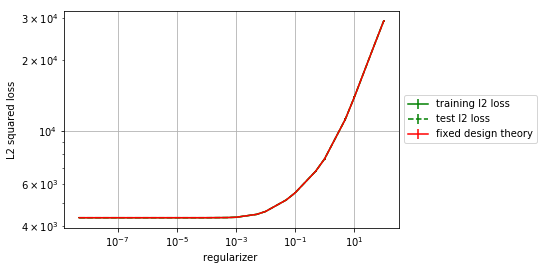

('noise level', '1e-1')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


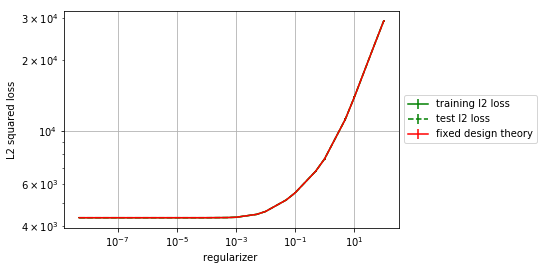

('noise level', '1e0')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


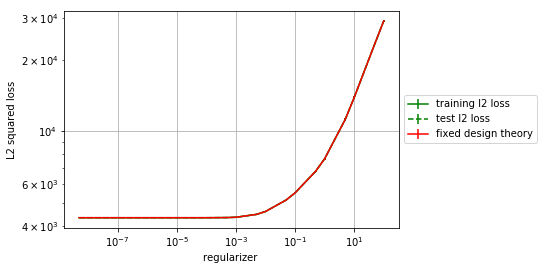

('noise level', '1e1')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


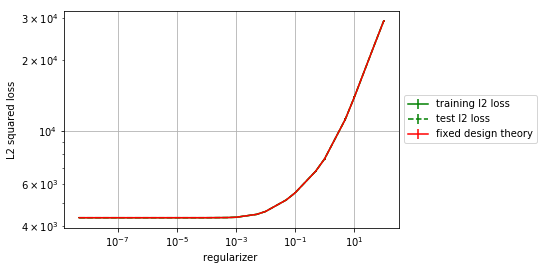

('noise level', '1e2')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


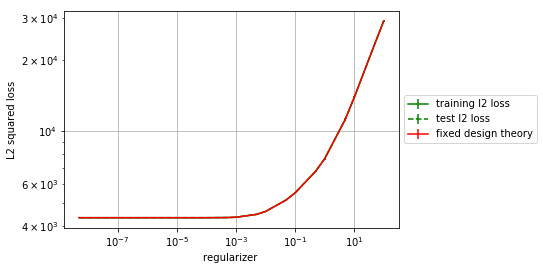

('noise level', '1e3')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


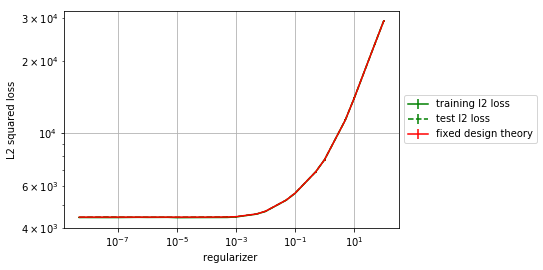

('noise level', '1e4')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


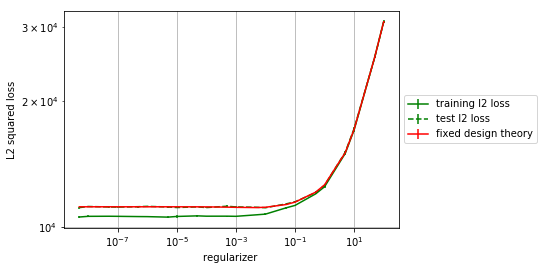

('noise level', '1e5')
[5e-09, 1e-08, 5e-08, 1e-07, 5e-07, 1e-06, 5e-06, 1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]


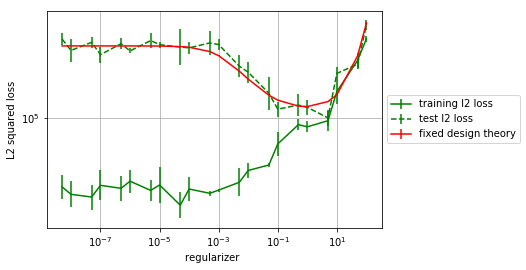

In [45]:
for noise_level in ["1e-2", "1e-1", "1e0", "1e1", "1e2", "1e3", "1e4", "1e5"]:
    print("noise level", noise_level)
    plot_single_precision(subkey_list_input=["fp_rff", "n_fp_feat_1024", "_noise_sigma_" + noise_level],
                         noise_sigma=noise_level, n_fp_feat=1024, 
                         general_folder=general_folder, general_folder_eigen=general_folder_eigen, Y_train=Y_train)